# parking space line detection


In [60]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Image dimensions: (600, 600, 3)


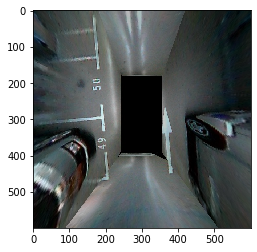

In [80]:
# read image
src = cv2.imread('img/002.bmp')
print('Image dimensions:', src.shape)
plt.imshow(src)

In [62]:
# gray scale
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

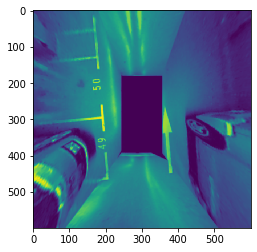

In [63]:
# low pass filter
blur = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blur)

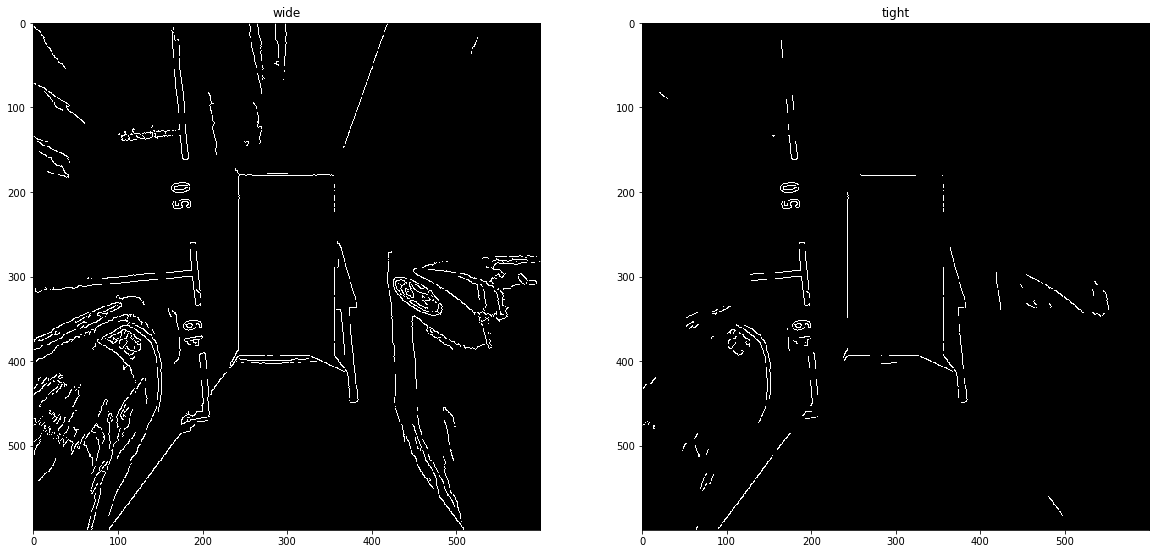

In [64]:
# find eges
wide = cv2.Canny(blur, 30, 100)
tight = cv2.Canny(blur, 200, 240)
 
# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight, cmap='gray')

In [65]:
edges = cv2.Canny(blur, 30, 100)

number of lines: 34


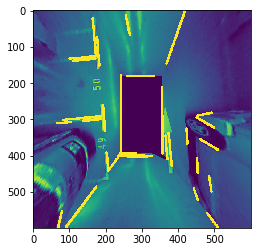

In [66]:
# Define the Hough transform parameters
rho = 1
theta = np.pi/180
threshold = 40
min_line_length = 35
max_line_gap = 5

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on the image copy
line_image = np.copy(gray) #creating an image copy to draw lines on
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)
print('number of lines:',lines.shape[0])

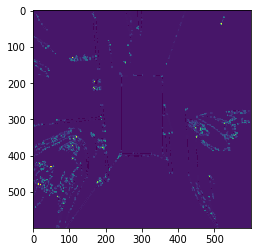

In [83]:
# Detect corners 
dst = cv2.cornerHarris(edges, 2, 3, 0.04)
# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)
plt.imshow(dst)

直接在图片里找噪点比较多

Image dimensions: (24, 24, 3)


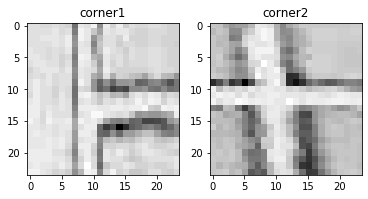

In [106]:
corner1 = cv2.imread('img/corner1.jpg')
corner2 = cv2.imread('img/corner2.jpg')
print('Image dimensions:', corner1.shape)

# convert 2 gray scale
gray_corner1 = cv2.cvtColor(corner1, cv2.COLOR_BGR2GRAY)
gray_corner2 = cv2.cvtColor(corner2, cv2.COLOR_BGR2GRAY)

# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))

ax1.set_title('corner1')
ax1.imshow(gray_corner1, cmap='gray')

ax2.set_title('corner2')
ax2.imshow(gray_corner2, cmap='gray')

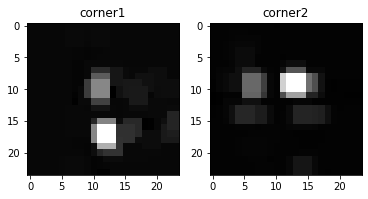

In [107]:
# Detect corners 
dst1 = cv2.cornerHarris(gray_corner1, 2, 3, 0.04)
# Dilate corner image to enhance corner points
dst1 = cv2.dilate(dst1,None)

dst2 = cv2.cornerHarris(gray_corner2, 2, 3, 0.04)
# Dilate corner image to enhance corner points
dst2 = cv2.dilate(dst2,None)


# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))

ax1.set_title('corner1')
ax1.imshow(dst1, cmap='gray')

ax2.set_title('corner2')
ax2.imshow(dst2, cmap='gray')

(0, 24)

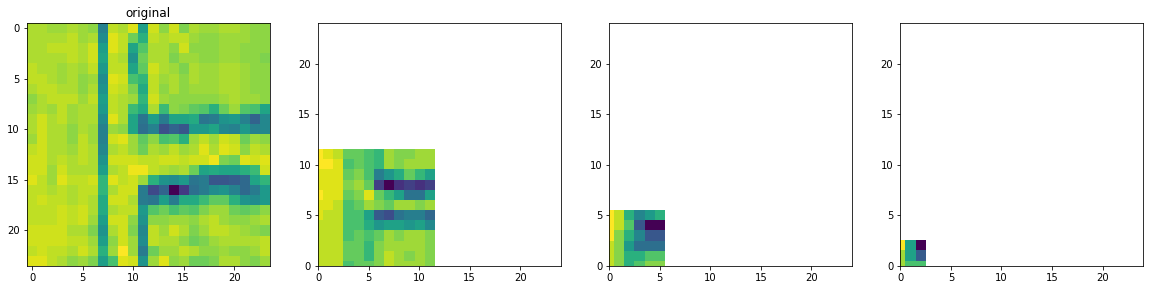

In [110]:
# image pyrmiad
image = gray_corner1
level_1 = cv2.pyrDown(gray_corner1)
level_2 = cv2.pyrDown(level_1)
level_3 = cv2.pyrDown(level_2)

# Display the images
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('original')
ax1.imshow(image)

ax2.imshow(level_1)
ax2.set_xlim([0, image.shape[1]])
ax2.set_ylim([0, image.shape[0]])

ax3.imshow(level_2)
ax3.set_xlim([0, image.shape[1]])
ax3.set_ylim([0, image.shape[0]])

ax4.imshow(level_3)
ax4.set_xlim([0, image.shape[1]])
ax4.set_ylim([0, image.shape[0]])

In [111]:
#Oriented FAST and Rotated BRIEF (ORB

In [114]:
# Import copy to make copies of the training image
import copy

training_gray = gray

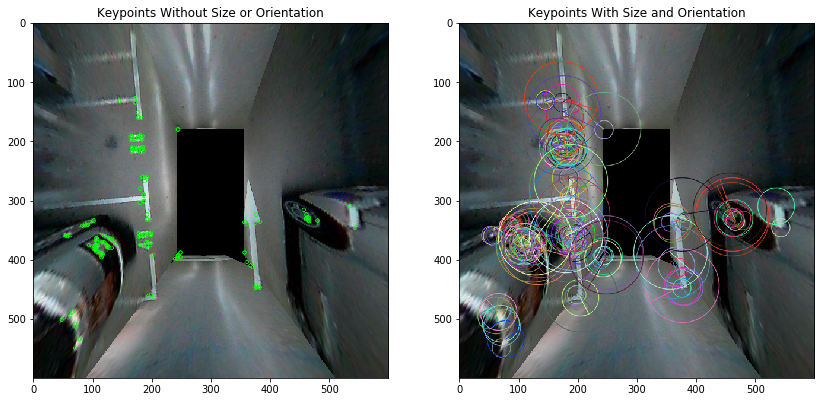


Number of keypoints Detected:  175


In [117]:
# Import copy to make copies of the training image
import copy

training_gray = gray
training_image = src
# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
orb = cv2.ORB_create(200, 2.0)

# Find the keypoints in the gray scale training image and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask.
keypoints, descriptor = orb.detectAndCompute(training_gray, None)

# Create copies of the training image to draw our keypoints on
keyp_without_size = copy.copy(training_image)
keyp_with_size = copy.copy(training_image)

# Draw the keypoints without size or orientation on one copy of the training image 
cv2.drawKeypoints(training_image, keypoints, keyp_without_size, color = (0, 255, 0))

# Draw the keypoints with size and orientation on the other copy of the training image
cv2.drawKeypoints(training_image, keypoints, keyp_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with the keypoints without size or orientation
plt.subplot(121)
plt.title('Keypoints Without Size or Orientation')
plt.imshow(keyp_without_size)

# Display the image with the keypoints with size and orientation
plt.subplot(122)
plt.title('Keypoints With Size and Orientation')
plt.imshow(keyp_with_size)
plt.show()

# Print the number of keypoints detected
print("\nNumber of keypoints Detected: ", len(keypoints))

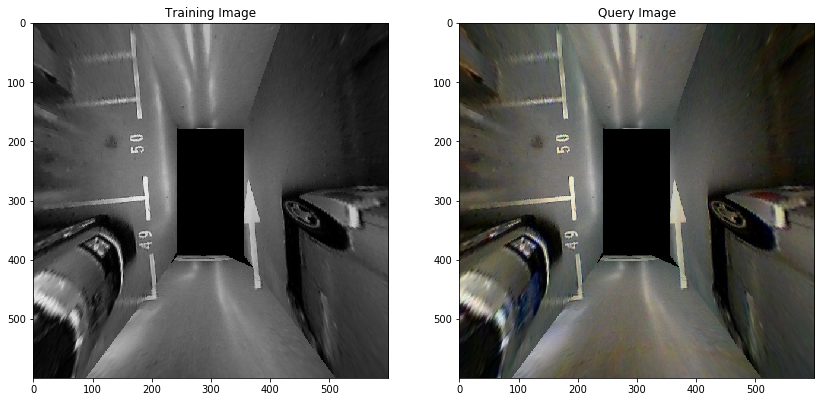

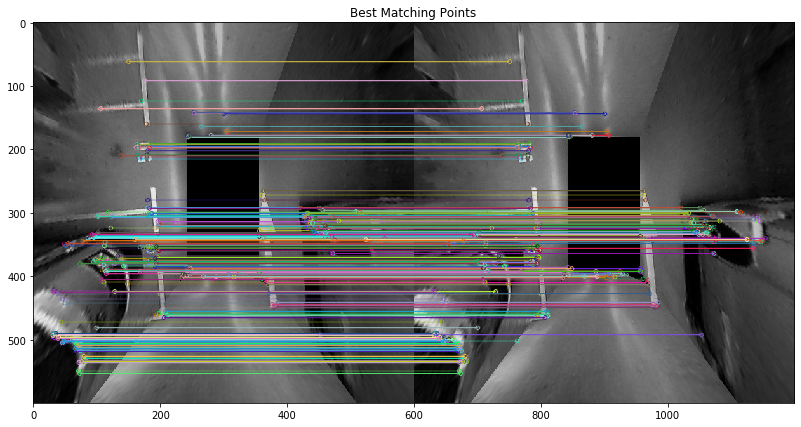

Number of Keypoints Detected In The Training Image:  780
Number of Keypoints Detected In The Query Image:  776

Number of Matching Keypoints Between The Training and Query Images:  704


In [118]:
import cv2
import matplotlib.pyplot as plt

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Load the training image
image1 = gray

# Load the query image
image2 = src

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the query image to RGB
query_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the training and query images
plt.subplot(121)
plt.title('Training Image')
plt.imshow(training_image)
plt.subplot(122)
plt.title('Query Image')
plt.imshow(query_image)
plt.show()

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)

# Convert the query image to gray scale
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)

# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
orb = cv2.ORB_create(1000, 2.0)

# Find the keypoints in the gray scale training and query images and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask in either case.
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)

# Create a Brute Force Matcher object. Set crossCheck to True so that the BFMatcher will only return consistent
# pairs. Such technique usually produces best results with minimal number of outliers when there are enough matches.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the query image
matches = bf.match(descriptors_train, descriptors_query)

# The matches with shorter distance are the ones we want. So, we sort the matches according to distance
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the training image with their best matching keypoints in the query image.
# The best matches correspond to the first elements in the sorted matches list, since they are the ones
# with the shorter distance. We draw the first 300 mathces and use flags = 2 to plot the matching keypoints
# without size or orientation.
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:300], query_gray, flags = 2)

# Display the best matching points
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))